In [17]:
import matplotlib.pyplot as plt
import numpy as np
import imageio
from skimage.filters import gaussian, median, sobel

%matplotlib inline

In [2]:
filename = '/Users/knapen/Desktop/prf_lyon/data/sub-01/behavior/rg_11_2019-03-08_12.23.12_TR_movie.mp4'

vid = imageio.get_reader(filename,  'ffmpeg')

In [5]:
imgs = np.zeros((vid.get_length(),1680,1050))

for vfi in range(vid.get_length()):
    imgs[vfi] = vid.get_data(vfi).sum(-1).T

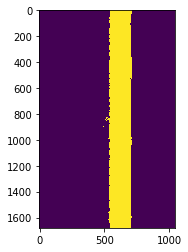

In [10]:
med_img = np.median(imgs,0)
binarized_imgs = np.array([i!=med_img for i in imgs])
plt.imshow(binarized_imgs[20])

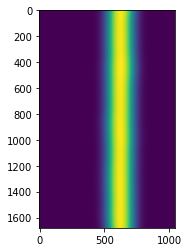

In [24]:
sm_bin_imgs = np.array([gaussian(i, 50) for i in binarized_imgs])
plt.imshow(sm_bin_imgs[20])

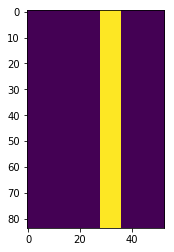

In [26]:
bin_sm_bin_imgs = sm_bin_imgs > 0.5
plt.imshow(bin_sm_bin_imgs[20,::20,::20])

In [43]:
np.save('/Users/knapen/Desktop/prf_lyon/data/sub-01/dm.npy', bin_sm_bin_imgs.astype(np.uint8))

In [40]:
ssr = 10
sub_sampled_dm = bin_sm_bin_imgs[:,::ssr,::ssr]
sub_sampled_dm_out = np.zeros((sub_sampled_dm.shape[0],
          sub_sampled_dm.shape[1],
          sub_sampled_dm.shape[1]))
border = int((sub_sampled_dm_out.shape[2] - sub_sampled_dm.shape[2])/2)
sub_sampled_dm_out[:,:,border:border+sub_sampled_dm.shape[2]] = sub_sampled_dm

In [42]:
np.save('/Users/knapen/Desktop/prf_lyon/data/sub-01/dm_out.npy', sub_sampled_dm_out.astype(np.uint8))